### Aula 16 - Assíncrona

### Avaliação da Eficiência de Esreatégia de Modelo de Machine Learning

### Grupo 15

#### Nome: Ubiratan da Silva Tavares - RA: 23031559

#### Práticas Desenvolvidas:

#### Roteiro Inicial:

* Importe o banco de dados **Wine Quality** através da biblioteca **sklearn**.

* Sepeare os dados em conjuntos de features para uma variável **X** e a variável **target** para a variável **y**.

* Divida os dados em conjuntos de treinamneto e teste, considerando a prporporção 80% - 20% e **random_state** = 0

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

class DataSet:
    
    def __init__(self):
        wine_data = load_wine()
        self.X = wine_data.data
        self.y = wine_data.target
        
    def split_data(self, test_size=0.2, random_state=0):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

In [2]:
# Criando a classe abstrata para ser herdado pelos modelos k-Nearest Neighbor e Random Forest

from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

class Modelo(ABC):
    
    def __init__(self, values):
        self.values = values
        self.scores = []
    
    @abstractmethod
    def create_model(self, value):
        pass
    
    def evaluate_by_cross_validation(self, X_train, y_train, cv=5, scoring='accuracy'):
        for value in self.values:
            model = self.create_model(value)
            scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
            self.scores.append(scores.mean())
        print(self.scores)

    def plot(self, title, x_label, y_label):
        plt.figure(figsize=(8, 6))
        plt.plot(self.values, self.scores, marker='o', linestyle='-')
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(True)
        plt.show()

In [3]:
# Criando a classe para o modelo k-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

class KNN(Modelo):
    
    def create_model(self, value):
        return KNeighborsClassifier(n_neighbors=value)   

In [4]:
# Criando a classe para o modelo Random Forest

from sklearn.ensemble import RandomForestClassifier

class RF(Modelo):

    def create_model(self, value):
        return RandomForestClassifier(n_estimators=value, random_state=0) 


#### Exercício 1

* Verifique o desempenho do algoritmo **k-Nearest Neighbor** na tarefa de classificação das classes envolvidas no *dataset* para três diferentes valores do parâmetro **k**: 2, 5 e 10.

* Verifique o valor da acurácia para cada um dos valores do parâmetro **k** e plote um gráfico mostrando a variação da acurácia pelo número de vizinhos.

In [5]:
dataset = DataSet()
X_train, X_test, y_train, y_test = dataset.split_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


[0.6911330049261084, 0.6832512315270935, 0.6972906403940887]


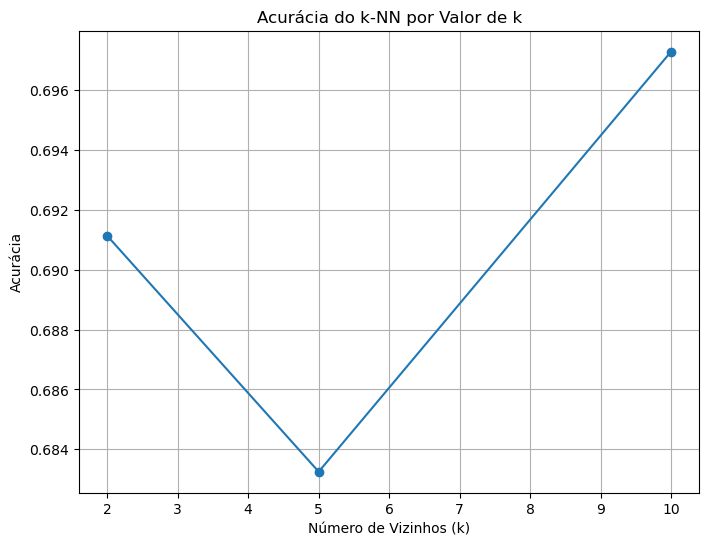

In [6]:
values = [2, 5, 10]
knn = KNN(values)
knn.evaluate_by_cross_validation(X_train, y_train)
knn.plot("Acurácia do k-NN por Valor de k", 'Número de Vizinhos (k)', 'Acurácia')

#### Exercício 2

* Verifique o desempenho do algoritmo ***Random Forest*** na tarefa de classificação das classes envolvidas no ***dataset*** para três valores diferentes do número de árvores existentes na floresta.

* O parâmetro **n_estimators** deve assumir os valores 10, 50 e 100.

* Calcule a acurácia para cada um dos valores

* Plote um gráfico mostrando a variação do desempenho do modelo de acordo com a variação do parâmetro.

* O gráfico deve indicar a variação da acurácia pelo número de árvores na floresta

[0.9647783251231526, 0.9793103448275862, 0.972167487684729]


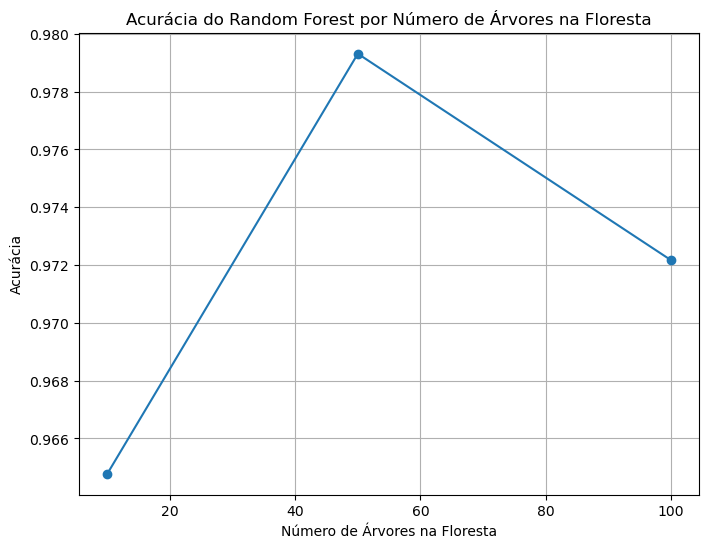

In [7]:
values = [10, 50, 100]
rf = RF(values)
rf.evaluate_by_cross_validation(X_train, y_train)
rf.plot("Acurácia do Random Forest por Número de Árvores na Floresta", 'Número de Árvores na Floresta', 'Acurácia')

#### Exercício 3

* Explique as diferenças encontradas nos resultados dos exercícios 1 e 2.

As diferenças nos resultados obtidos através dos exercícios 1 e 2 podem ser explicadas pelas diferenças nos algoritmos de classificação aplicados ao conjunto de dados.

No exercício 1 foi utilizado o modelo k-Nearest Neighbor (kNN), um algoritmo de aprendizado de máquina baseado em vizinhos mais próximos. A acurácia do kNN varia com o valor de k (número de vizinhos considerados). Em geral, valores maiores de k tendem a suavizar as fronteiras de decisão e podem levar a um desempenho mais estável, mas podem não funcionar bem para conjuntos de dados complexos.

No exercício 2 foi utilizado o modelo Random Forest, um algoritmo de ensemble baseado em árvores de decisão. A acurácia do Random Forest varia com o número de árvores na floresta (n_estimators). Aumentar o número de árvores geralmente melhora o desempenho do modelo até um certo ponto, após o qual os ganhos diminuem.

Em resumo, as diferenças nos resultados se devem às características intrínsecas desses algoritmos e como seus parâmetros afetam o desempenho em diferentes cenários. O kNN é sensível ao valor de k, enquanto o Random Forest é sensível ao número de árvores na floresta. A escolha do algoritmo depende da natureza do problema e do conjunto de dados.

Para finalizar, será comparado o desempenho desses algoritmos com base nos melhores valores de acurácia:

* Para o k-Nearest Neighbor, o melhor desempenho foi alcançado com k = 10, resultando em uma acurácia de 0.6973.

* Para o Random Forest, o melhor desempenho foi alcançado com n_estimators = 50, resultando em uma acurácia de 0.9793.

Portanto, com base nos valores de acurácia, o Random Forest com n_estimators = 50 teve um desempenho significativamente melhor em comparação com o k-Nearest Neighbor com k = 10. 

No entanto, é importante lembrar que a escolha do algoritmo depende não apenas da acurácia, mas também de outros fatores, 
como a interpretabilidade do modelo, a eficiência computacional e a adequação para o problema específico a ser tratado.